# import

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/5팀(윤정준, 최애림, 진청아, 이정현a)/코드

/content/drive/.shortcut-targets-by-id/1niQkF2oFYkuV2aahMfHbpa3kXs5yrcAd/5팀(윤정준, 최애림, 진청아, 이정현a)/코드


# TEST

## 마스킹 원본 이미지

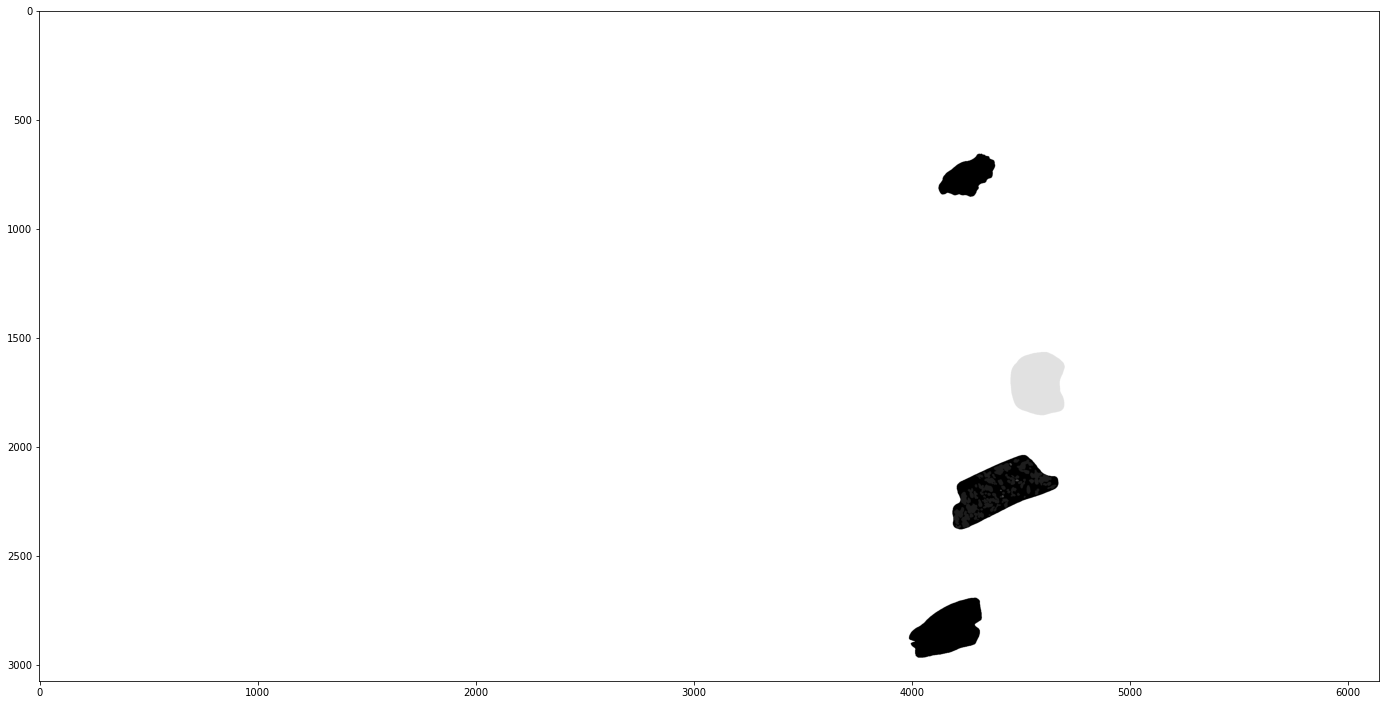

In [ ]:
real_base_dir = './train_imgs/'
mask_base_dir = './train_masks/'

filenames_mask = os.listdir(mask_base_dir)

real_file_paths = [real_base_dir + filename for filename in filenames_mask]
mask_file_paths = [mask_base_dir + filename for filename in filenames_mask]

real_img_arr = cv2.imread(real_file_paths[0], cv2.IMREAD_GRAYSCALE)
mask_img_arr = cv2.imread(mask_file_paths[0], cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (24,24))
plt.imshow(real_img_arr, cmap = 'gray')
plt.imshow(mask_img_arr, cmap = 'gray')

## 원본이미지에서 마스킹된 부분만 추출하기

In [ ]:
real_img_arr = cv2.imread(real_file_paths[0])
mask_img_arr = cv2.imread(mask_file_paths[0], cv2.IMREAD_GRAYSCALE)

real_img_arr_copy = np.full_like(real_img_arr, 255)

row, col, _ = real_img_arr_copy.shape

for i in range(row):
    for j in range(col):
        if mask_img_arr[i, j] not in [255,225] :
            real_img_arr_copy[i, j, 0] = real_img_arr[i, j, 0]
            real_img_arr_copy[i, j, 1] = real_img_arr[i, j, 1]
            real_img_arr_copy[i, j, 2] = real_img_arr[i, j, 2]
real_img_arr_copy

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

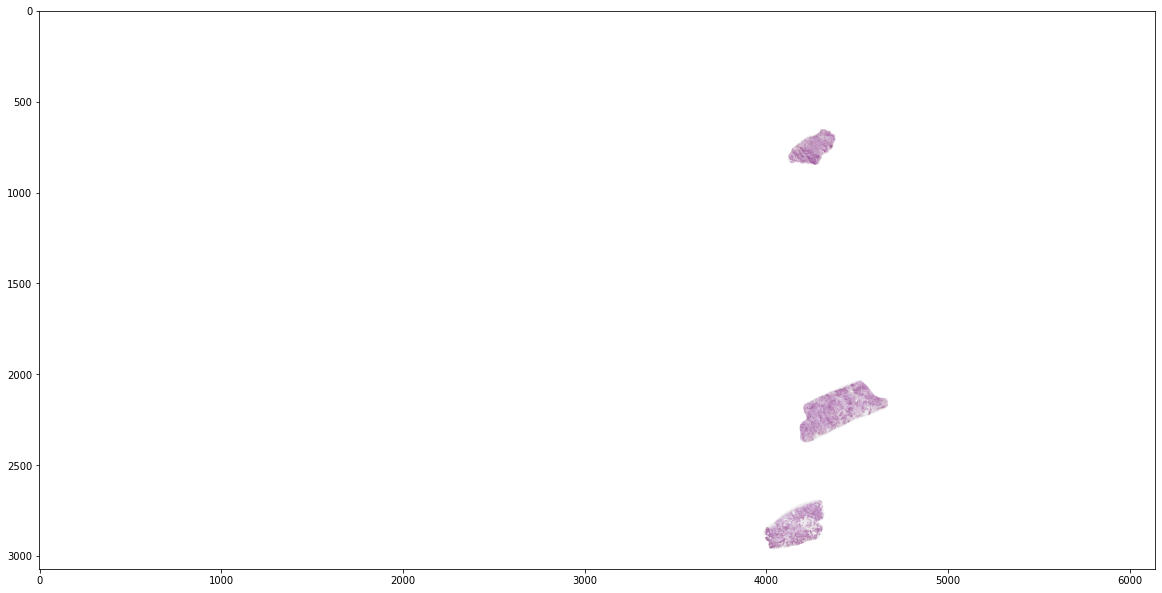

In [ ]:
plt.figure(figsize = (20,24))
plt.imshow(real_img_arr_copy)

In [ ]:
save_dir = './whole_mask_train/'

check_os = os.listdir(save_dir)

len(check_os)

58

# 최종: 마스킹 이미지(총 58개) 저장 
 - 종양인 부분_tumor VS 종양이 아닌 부분_normal

## 1) normal인 부분

In [ ]:
real_base_dir = './train_imgs/'
mask_base_dir = './train_masks/'
save_normal_dir = './whole_mask_normal/'

filenames_mask = os.listdir(mask_base_dir)

real_file_paths = [real_base_dir + filename for filename in filenames_mask]
mask_file_paths = [mask_base_dir + filename for filename in filenames_mask]

for img, single_name in zip(range(len(real_file_paths)), filenames_mask):
  real_img_arr = cv2.imread(real_file_paths[img])
  mask_img_arr = cv2.imread(mask_file_paths[img], cv2.IMREAD_GRAYSCALE)

  real_img_arr_copy = np.full_like(real_img_arr, 255)

  row, col, _ = real_img_arr_copy.shape

# normal인 부분
  for i in range(row):
      for j in range(col):
          if mask_img_arr[i, j] == 225 : # 225 (normal)
              real_img_arr_copy[i, j, 0] = real_img_arr[i, j, 0]
              real_img_arr_copy[i, j, 1] = real_img_arr[i, j, 1]
              real_img_arr_copy[i, j, 2] = real_img_arr[i, j, 2]
  
  # 파일저장
  save_file_name = os.path.join(save_normal_dir, single_name)
  plt.imsave(save_file_name, real_img_arr_copy)

## 2) tumor인 부분

In [ ]:
save_tumor_dir = './whole_mask_tumor/'

filenames_mask = os.listdir(mask_base_dir)

real_file_paths = [real_base_dir + filename for filename in filenames_mask]
mask_file_paths = [mask_base_dir + filename for filename in filenames_mask]

for img, single_name in zip(range(len(real_file_paths)), filenames_mask):
  real_img_arr = cv2.imread(real_file_paths[img])
  mask_img_arr = cv2.imread(mask_file_paths[img], cv2.IMREAD_GRAYSCALE)

  real_img_arr_copy = np.full_like(real_img_arr, 255)

  row, col, _ = real_img_arr_copy.shape

# tumor인 부분
  for i in range(row):
      for j in range(col):
          if mask_img_arr[i, j] not in [255,225] : # 225 (normal), 255 (background)
              real_img_arr_copy[i, j, 0] = real_img_arr[i, j, 0]
              real_img_arr_copy[i, j, 1] = real_img_arr[i, j, 1]
              real_img_arr_copy[i, j, 2] = real_img_arr[i, j, 2]
  
  # 파일저장
  save_file_name = os.path.join(save_tumor_dir, single_name)
  plt.imsave(save_file_name, real_img_arr_copy)